# Model
## Visual Data Science

Clara Pichler, 11917694

This part of the project will introduce an abstract representation of the data. This will help to find answers to the questions discussed in the _Discover_ part. Clustering countries based on their medal counts and related features is an approach to explore potential commonalities among top-performing countries.



### Notes

After building a model, create one or more visualization(s) that describe the results of your model. 


## Requirements & Dependencies

This project was created using Python 3.12.5. The exact versions of the dependencies can be installed with the following command.

In [ ]:
%pip install -r requirements.txt -q

Note: you may need to restart the kernel to use updated packages.


In [126]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests as r
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.impute import SimpleImputer

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.metrics import silhouette_samples

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA

## Data

In [51]:
df_olympics_merged = pd.read_csv('data/merged_data.csv')

df_olympics_merged['total_medals_year'] = df_olympics_merged.groupby(['country_name', 'year'])['medal_type'].transform('count')

In [130]:
display(df_olympics_merged.head(5))
display(df_olympics_merged.info())
display(df_olympics_merged.describe())

,discipline_title,year,event_title,event_gender,medal_type,participant_type,country_name,season,max_elevation,min_elevation,elevation_span,climate_zone,avg_celsius,isocode,gdp_new,total_medals_year
0,Curling,2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,Winter,4810.0,-3.0,4813.0,CSA,14.47,ITA,2.066972e+12,17
1,Curling,2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,Winter,2469.0,0.0,2469.0,DFC,5.03,NOR,5.937270e+11,37
2,Curling,2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,Winter,2097.0,-2.0,2099.0,DFB,7.25,SWE,5.904096e+11,18
3,Curling,2022,Women,Women,GOLD,GameTeam,United Kingdom,Winter,1345.0,-4.0,1349.0,CFB,10.75,GBR,3.088840e+12,2
4,Curling,2022,Women,Women,SILVER,GameTeam,Japan,Winter,3776.0,-4.0,3780.0,DFB,15.19,JPN,4.256411e+12,18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11378 entries, 0 to 11377
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   discipline_title   11378 non-null  object 
 1   year               11378 non-null  int64  
 2   event_title        11378 non-null  object 
 3   event_gender       11378 non-null  object 
 4   medal_type         11378 non-null  object 
 5   participant_type   11378 non-null  object 
 6   country_name       11378 non-null  object 
 7   season             11378 non-null  object 
 8   max_elevation      11378 non-null  float64
 9   min_elevation      11378 non-null  float64
 10  elevation_span     11378 non-null  float64
 11  climate_zone       11378 non-null  object 
 12  avg_celsius        11378 non-null  float64
 13  isocode            10807 non-null  object 
 14  gdp_new            10807 non-null  float64
 15  total_medals_year  11378 non-null  int64  
dtypes: float64(5), int64(2

None

,year,max_elevation,min_elevation,elevation_span,avg_celsius,gdp_new,total_medals_year
count,11378.000000,11378.000000,11378.000000,11378.000000,11378.000000,1.080700e+04,11378.000000
mean,2003.981016,4040.224292,-18.539242,3496.372397,12.855381,2.747544e+12,43.976622
std,11.408790,2208.470824,74.777029,2060.972047,5.617335,4.602441e+12,43.702436
min,1984.000000,63.000000,-428.000000,9.003000,1.220000,2.221006e+08,1.000000
25%,1994.500000,2228.000000,-28.000000,1974.000000,10.400000,2.079986e+11,13.000000
50%,2004.000000,3776.000000,-4.000000,2966.000000,12.640000,8.916090e+11,27.000000
75%,2014.000000,5959.000000,0.000000,5646.000000,14.620000,2.697807e+12,63.000000
max,2022.000000,8849.000000,772.000000,8611.000000,32.040000,2.574411e+13,181.000000


## Exploratory Data Analysis (EDA)

Conducting EDA is essential. It helps you visualize data distributions, identify outliers, and understand relationships between variables. This step can guide you in choosing the appropriate clustering algorithm and the number of clusters.

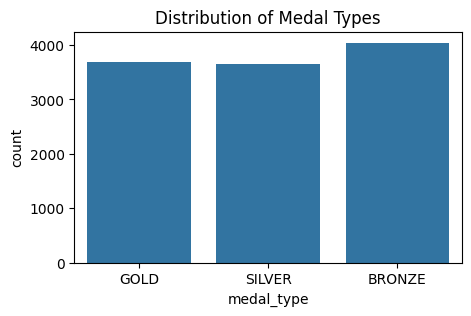

In [ ]:
plt.figure(figsize=(5, 3))
sns.countplot(x='medal_type', data=df_olympics_merged)
plt.title('Distribution of Medal Types')
plt.show()

/var/folders/4j/v1g8gthx209g90f63vh1krc80000gn/T/ipykernel_31901/376512874.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=df_olympics_merged, palette='viridis')


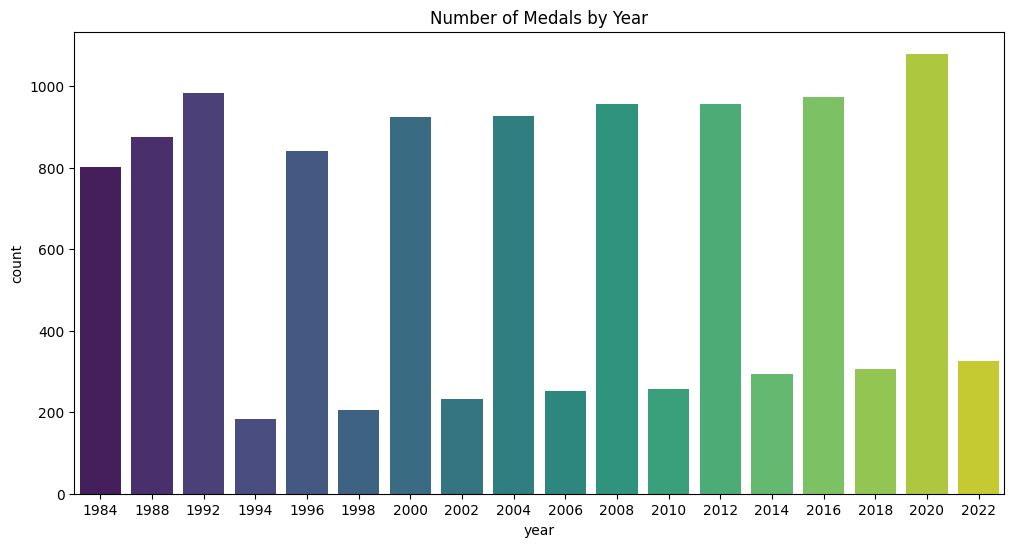

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='year', data=df_olympics_merged, palette='viridis')
plt.title('Number of Medals by Year')
plt.show()

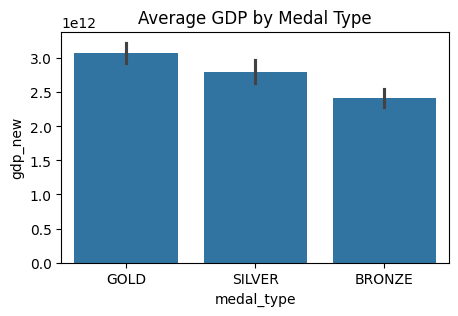

In [ ]:
plt.figure(figsize=(5, 3))
sns.barplot(x='medal_type', y='gdp_new', data=df)
plt.title('Average GDP by Medal Type')
plt.show()

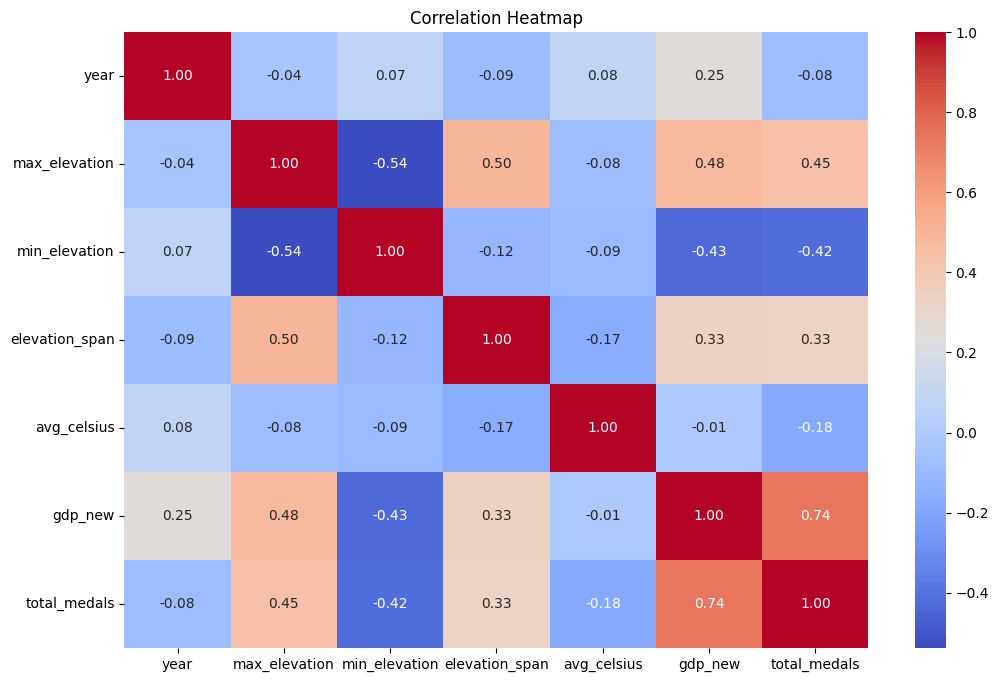

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = df_olympics_merged.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

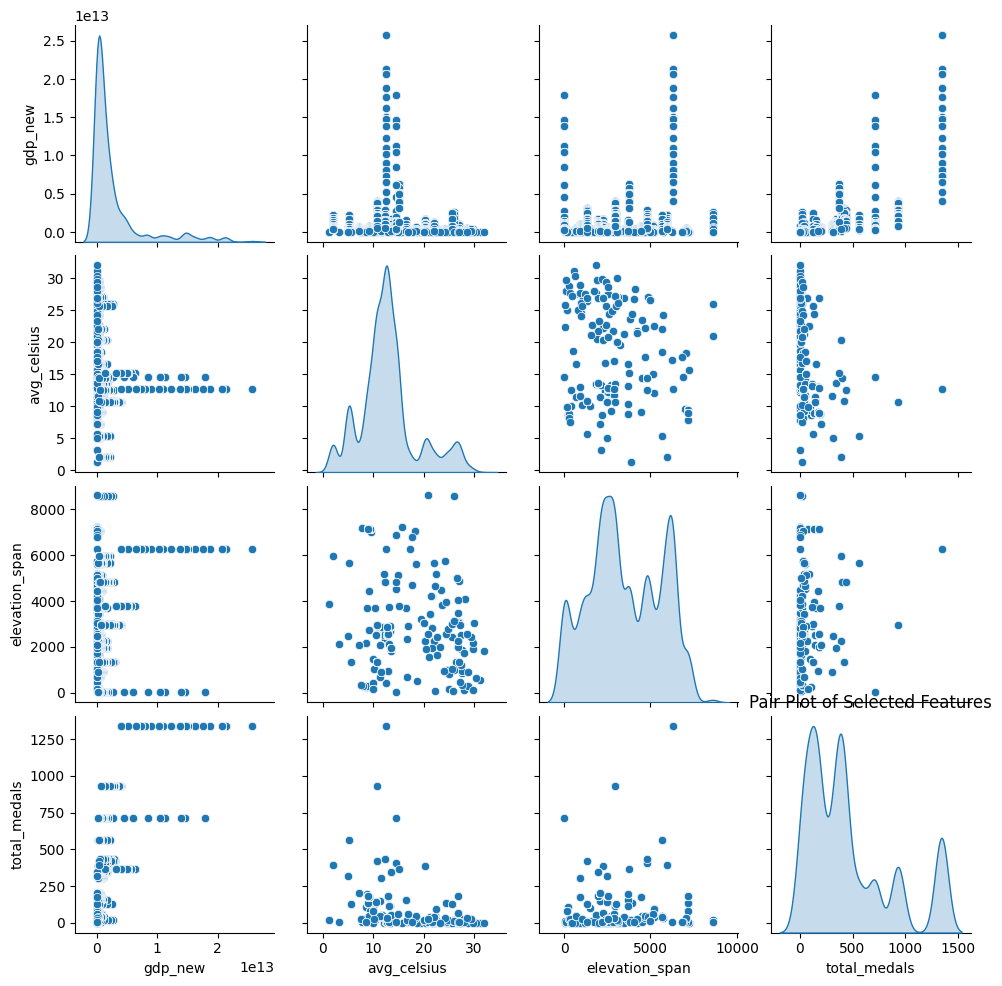

In [ ]:
sns.pairplot(df_olympics_merged[['gdp_new', 'avg_celsius', 'elevation_span', 'total_medals']], diag_kind='kde')
plt.title('Pair Plot of Selected Features')
plt.show()

/var/folders/4j/v1g8gthx209g90f63vh1krc80000gn/T/ipykernel_31901/997031499.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='mako')


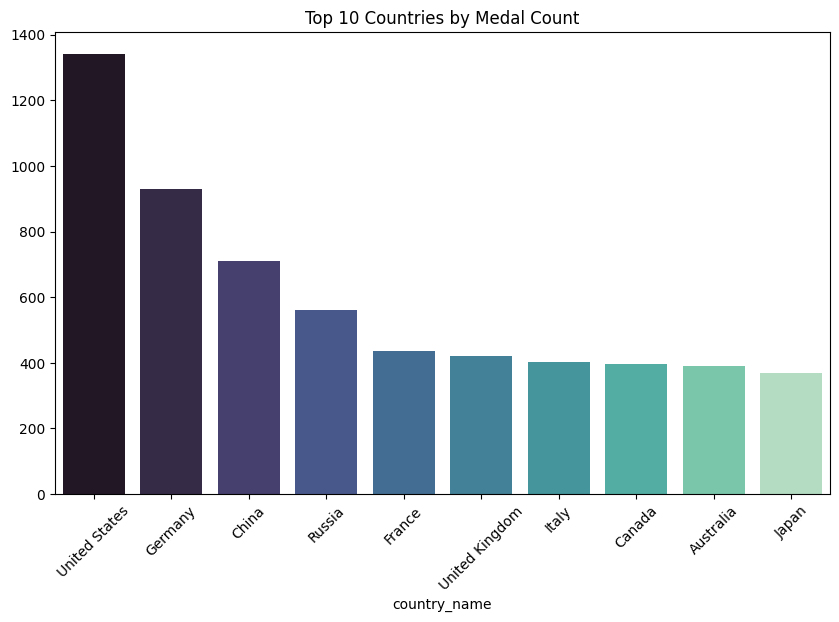

In [ ]:
top_countries = df_olympics_merged['country_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='mako')
plt.title('Top 10 Countries by Medal Count')
plt.xticks(rotation=45)
plt.show()

## Clustering

https://medium.com/@nomannayeem/clustering-with-confidence-a-practical-guide-to-data-clustering-in-python-15d82d8a7bfb

This model will cluster countries based on similar attributes (GDP, climate zone, elevation, etc.) to find patterns among high-performing countries.

__Objective__: Group countries based on similar characteristics related to medal wins.

Considering four clustering methods:

- __K-Means__: Ideal for spherical clusters and well-separated data. It’s fast and efficient but requires specifying the number of clusters beforehand.

- __Hierarchical Clustering__: Does not require specifying the number of clusters in advance. It builds a hierarchy of clusters and is useful for nested clusters.

- __DBSCAN__: Great for data with noise and clusters of varying shapes and densities. It does not require specifying the number of clusters but instead relies on density parameters.

- __HDBSCAN__: An extension of DBSCAN, handling varying densities within clusters more effectively.


Choosing the right distance metric is crucial:

- __Euclidean Distance__: Standard for K-means.

- __Manhattan Distance__: Useful for high-dimensional spaces.

- __Correlation-Based Distance__: Ideal for gene expression data and other contexts where relationships between variables matter more than their absolute values.

In [182]:
df_clustering = df_olympics_merged.copy()

df_clustering = df_clustering.drop(['discipline_title', 'event_title', 'event_gender', 
                                  'medal_type', 'participant_type', 'season'], axis=1)
    
df_clustering = df_clustering.drop_duplicates().dropna()

climate_zone = df_clustering['climate_zone']
countries = df_clustering['country_name']
medals = df_clustering['total_medals_year']
max_elevation = df_clustering['max_elevation']

df_clustering = pd.get_dummies(df_clustering, columns=['climate_zone'])
df_clustering = df_clustering.drop(['country_name', 'isocode'], axis=1)

In this step, we will start using Sklearn algorithms to ensure that our data has the same pattern of variation. With the Normalizer function from the sklearn.preprocessing package and the .fit_transform() method, it’s possible to scale the data down between 0 and 1. If we do not take this into account, the KMeans algorithm may end up giving disproportionately greater weight to features with higher magnitudes and may be unaware of features with lower magnitudes but equally important.

By utilizing normalization, we can avoid mistakenly assigning points to the wrong clusters when using a clustering process.

In [183]:
scaler = StandardScaler()
df_clustering_scaled = scaler.fit_transform(df_clustering)

To improve a ML process, one of the most effective steps to be executed is to decrease the number of features used in the models. A smaller number of features can often manage to achieve a level of explainability which is similar to the one achieved when using the full dataset. Moreover, it can save a large amount of memory loading and processing. To do so, we can use PCA from the sklearn.decomposition package, which helps us to choose the n features that preserves the most of the variance.

To achieve this, we instantiate the PCA() object as pca. We then need to fit our normalized data. We can then plot the cumulative variance ratio, which show us that it's possible to retain almost 100% of the variation by using only 6 out of the 16 features. A number of features that preserves at least 90% of the total variation is a good threshold, so for our example we will take the first five components.

In [184]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_clustering_scaled)

__Elbow Method__: The Elbow Method involves plotting the within-cluster sum of squares (WCSS) against the number of clusters. The optimal number of clusters is at the ‘elbow point,’ where the rate of decrease sharply slows down.

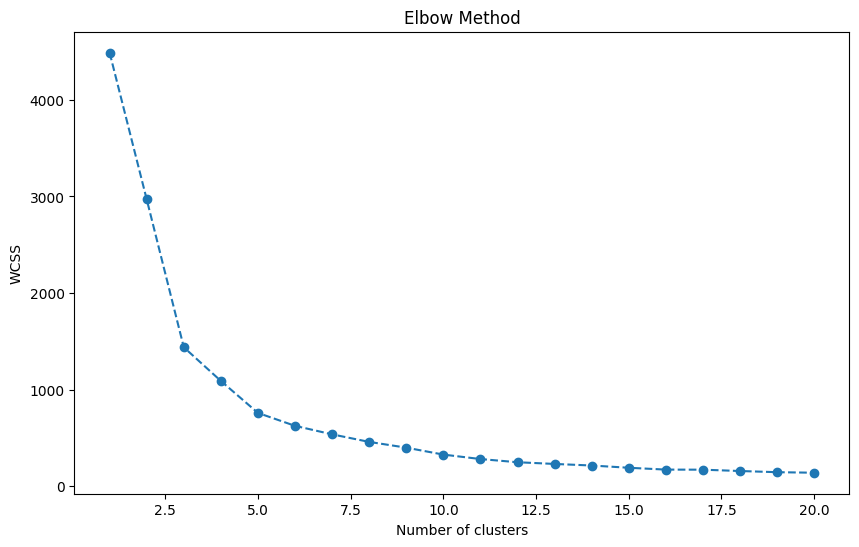

In [185]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow_method.png')
plt.show()

__Silhouette Analysis__: Silhouette Analysis evaluates how similar each point is to its own cluster compared to other clusters. The average silhouette score indicates the optimal number of clusters, with higher scores representing better-defined clusters.

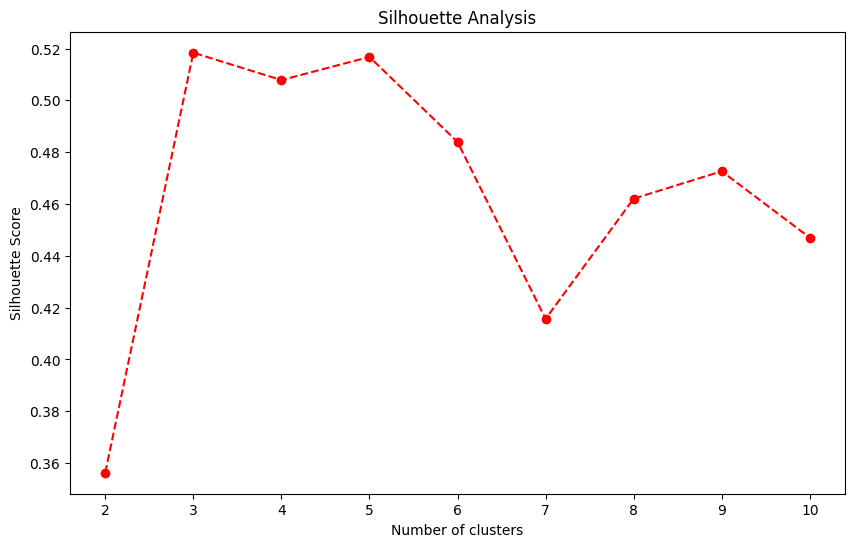

In [215]:
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_result)
    silhouette_avg = silhouette_score(pca_result, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='r')
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [186]:
n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters)
clusters_k = kmeans.fit_predict(pca_result)

In [187]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_d = dbscan.fit_predict(pca_result)

In [188]:
df_clustering['PCA1'] = pca_result[:, 0]
df_clustering['PCA2'] = pca_result[:, 1]
df_clustering['cluster_kmeans'] = clusters_k
df_clustering['cluster_dbscan'] = clusters_d
df_clustering['country_name'] = countries.values  
df_clustering['climate_zone'] = climate_zone.values

In [ ]:
fig = px.scatter(df_clustering, x='PCA1', y='PCA2', color='cluster_kmeans', 
                 hover_data={
                     'PCA1': False,      
                     'PCA2': False,       
                     'cluster_kmeans': False,    
                     'country_name': True,    
                     'total_medals_year': True, 
                     'max_elevation': True,
                     'climate_zone': True, 
                     'year': True        
                 },
                 title=f'Clustering of Countries',
                 labels={'PCA1': 'PCA Component 1', 'PCA2': 'PCA Component 2'})
    
fig.show()

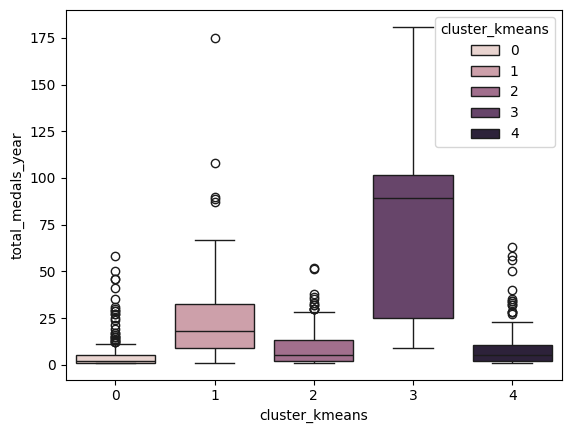

In [198]:
sns.boxplot(x = 'cluster_kmeans', y = 'total_medals_year', hue = 'cluster_kmeans', data = df_clustering);

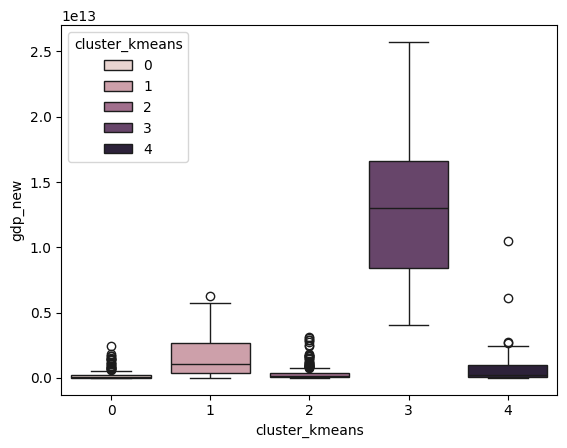

In [199]:
sns.boxplot(x = 'cluster_kmeans', y = 'gdp_new', hue = 'cluster_kmeans', data = df_clustering);

In [205]:
for i in range(0,5):
    df_clustering_clust = df_clustering[df_clustering['cluster_kmeans']==i]
    # print(df_clustering_clust['country_name'].unique())
    print(df_clustering_clust['climate_zone'].unique(), df_clustering['climate_zone'].mode())
    

['BWH' 'AW' 'CSA' 'AF' 'CFA' 'BWK' 'CWA' 'BSH' 'AM' 'CFB'] 0    CFB
Name: climate_zone, dtype: object
['DFC' 'DFB' 'CFB' 'BSK' 'DSC'] 0    CFB
Name: climate_zone, dtype: object
['DFB' 'CFB' 'DWB' 'DFC' 'CWB' 'ET'] 0    CFB
Name: climate_zone, dtype: object
['CFA' 'BSK'] 0    CFB
Name: climate_zone, dtype: object
['CSA' 'BWK' 'BSK' 'CFB' 'CSB' 'AW' 'CFA' 'DSB' 'BWH' 'AF'] 0    CFB
Name: climate_zone, dtype: object


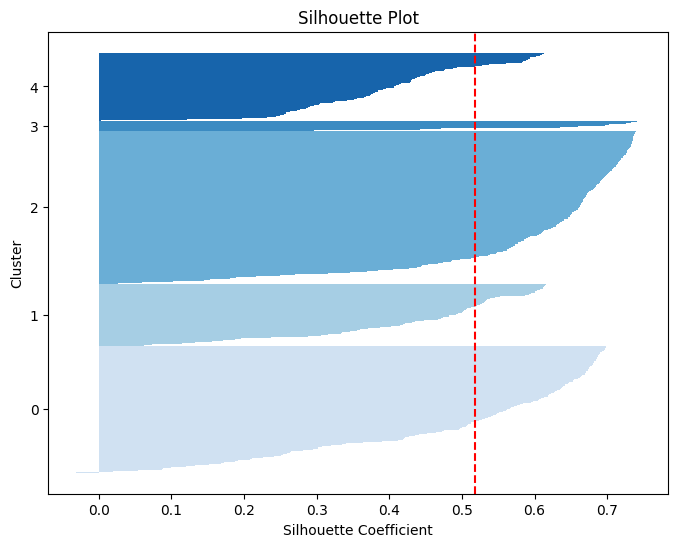

In [219]:
silhouette_vals = silhouette_samples(pca_result, clusters_k)

plt.figure(figsize=(8, 6))
y_lower, y_upper = 0, 0
yticks = []

cmap = plt.cm.Blues
colors = cmap(np.linspace(0.2, 0.8, len(np.unique(clusters_k)))) 

for i, cluster in enumerate(np.unique(clusters_k)):
    cluster_silhouette_vals = silhouette_vals[clusters_k == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1, color=colors[i])
    yticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(silhouette_vals.mean(), color="red", linestyle="--")

plt.yticks(yticks, np.unique(clusters_k))
plt.title('Silhouette Plot')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Cluster')

plt.show()

In [206]:
fig = px.scatter(df_clustering, x='PCA1', y='PCA2', color='cluster_dbscan', 
                 hover_data={
                     'PCA1': False,      
                     'PCA2': False,       
                     'cluster_kmeans': False,    
                     'country_name': True,    
                     'total_medals_year': True, 
                     'max_elevation': True,
                     'climate_zone': True, 
                     'year': True        
                 },
                 title=f'Clustering of Countries',
                 labels={'PCA1': 'PCA Component 1', 'PCA2': 'PCA Component 2'})
    
fig.show()

Function to preprocess, apply PCA, and perform clustering for a specific year.

In [211]:
def cluster_by_year(df, year, n_clusters=3):

    df_year = df[df['year'] == year].copy()
    
    df_clustering = df_year.drop(['discipline_title', 'event_title', 'event_gender', 
                                  'medal_type', 'participant_type', 'season', 'year'], axis=1)
    
    df_clustering = df_clustering.drop_duplicates().dropna()

    climate_zone = df_clustering['climate_zone']
    countries = df_clustering['country_name']
    medals = df_clustering['total_medals_year']
    max_elevation = df_clustering['max_elevation']

    df_clustering = pd.get_dummies(df_clustering, columns=['climate_zone'])
    df_clustering = df_clustering.drop(['country_name', 'isocode'], axis=1)
    
    scaler = StandardScaler()
    df_clustering_scaled = scaler.fit_transform(df_clustering)
    
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(df_clustering_scaled)

    wcss = []
    for i in range(1, 21):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(pca_result)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 21), wcss, marker='o', linestyle='--')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.savefig('elbow_method.png')
    plt.show()
    
    kmeans = KMeans(n_clusters=n_clusters)
    clusters = kmeans.fit_predict(pca_result)
    
    # Add PCA and cluster results back to the dataframe
    df_clustering['PCA1'] = pca_result[:, 0]
    df_clustering['PCA2'] = pca_result[:, 1]
    df_clustering['cluster'] = clusters
    df_clustering['country_name'] = countries.values  # Add back country names
    df_clustering['climate_zone'] = climate_zone.values
    
    fig = px.scatter(df_clustering, x='PCA1', y='PCA2', color='cluster', 
                     hover_data={
                     'PCA1': False,      
                     'PCA2': False,       
                     'cluster': False,    
                     'country_name': True,    
                     'total_medals_year': True, 
                     'max_elevation': True,
                     'climate_zone': True
                     },
                     title=f'Clustering of Countries - {year}',
                     labels={'PCA1': 'PCA Component 1', 'PCA2': 'PCA Component 2'})
    
    fig.show()
    
    return df_clustering


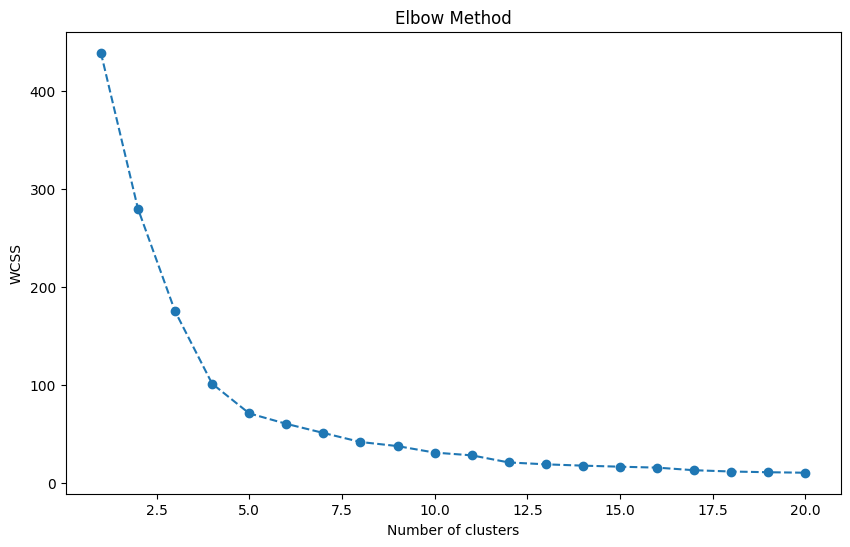

,max_elevation,min_elevation,elevation_span,avg_celsius,gdp_new,total_medals_year,climate_zone_AF,climate_zone_AM,climate_zone_AW,climate_zone_BSH,...,climate_zone_CSB,climate_zone_CWA,climate_zone_DFB,climate_zone_DFC,climate_zone_DWB,PCA1,PCA2,cluster,country_name,climate_zone
327,3715.0,0.0,3715.0,16.61,1.278129e+12,17,False,False,False,False,...,False,False,False,False,False,0.877816,0.218934,2,Spain,CSA
328,739.0,55.0,684.0,16.66,1.541248e+09,3,False,False,False,False,...,False,False,False,False,False,-1.215450,-1.408896,1,San Marino,CFB
329,6190.0,-85.5,6276.0,12.64,2.132295e+13,113,False,False,False,False,...,False,False,False,False,False,8.179807,0.999494,4,United States,CFA
332,4634.0,193.0,4441.0,9.10,7.419994e+11,13,False,False,False,False,...,False,False,False,True,False,1.442030,-1.307082,2,Switzerland,DFC
333,2169.0,28.0,2141.0,13.25,5.335648e+10,9,False,False,False,False,...,False,False,False,False,False,-0.316589,-1.306692,1,Serbia,CFB


In [213]:
df_cluster_results = cluster_by_year(df_olympics_merged, 2020, n_clusters=5)
display(df_cluster_results.head())

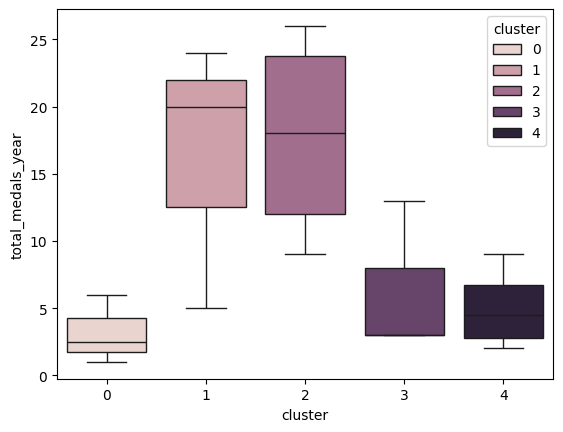

In [201]:
sns.boxplot(x = 'cluster', y = 'total_medals_year', hue = 'cluster', data = df_cluster_results);

<Axes: xlabel='cluster', ylabel='gdp_new'>

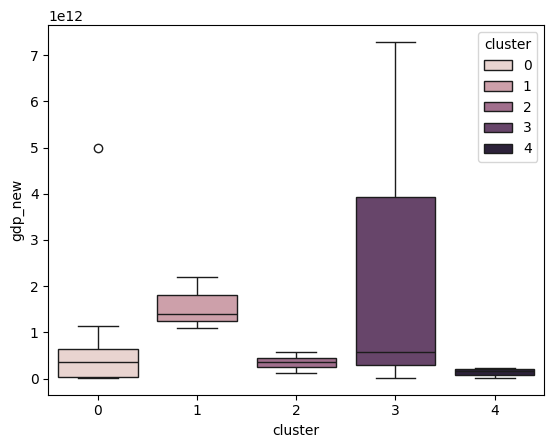

In [202]:
display(sns.boxplot(x = 'cluster', y = 'gdp_new', hue = 'cluster', data = df_cluster_results));

<Axes: xlabel='cluster', ylabel='gdp_new'>

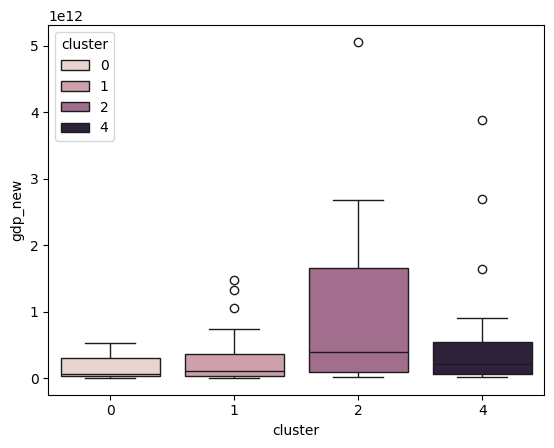

In [ ]:
display(sns.boxplot(x = 'cluster', y = 'gdp_new', hue = 'cluster', data = df_cluster_results[df_cluster_results['cluster']!=3]));

<Axes: xlabel='cluster', ylabel='max_elevation'>

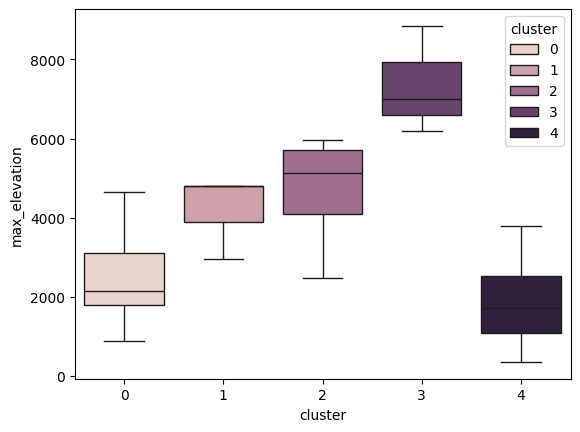

In [203]:

display(sns.boxplot(x = 'cluster', y = 'max_elevation', hue = 'cluster', data = df_cluster_results));